 # Import Libraries and set required parameters

In [5]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:',sns.__version__)


numpy version	: 1.20.3
pandas version	: 1.3.4
seaborn version	: 0.11.2


# Data Sourcing

In [6]:
loan=pd.read_csv(r"F:\Python\ML\loan.csv")
print(loan.shape)


(39717, 111)


F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning and Manipulation
#removeNulls(dataframe, axis, percent) will drop the columns/rows from the dataset based on the parameter values.

In [9]:
#Number of columns having null value more than 40% 
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

#print(loan.isnull().sum())
NA_col = column_wise_null_percentage(loan)
NA_col 
NA_col = NA_col[NA_col>0]
NA_col
NA_col_40 = NA_col[NA_col>40]

print("Number of columns having null value more than 40% :", len(NA_col_40.index))
print(NA_col_40)


Number of columns having null value more than 40% : 57
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
in

In [ ]:
#1. Remove columns where NA values are more than or equal to 40

In [10]:
loan = loan.drop(NA_col_40.index, axis =1)
loan.shape

(39717, 54)

In [ ]:
#Remove columns where number of unique value is only 1.
By removing all columns where number of unique value is only 1 because that will not impact our analysis.


In [11]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [12]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
loan.shape
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [ ]:
#Removing of other columns:
   
#Columns which are not required for our analysis we should remove them.

In [13]:
loan.drop(['member_id', 'id','zip_code','url'], axis=1, inplace=True)
loan.shape

(39717, 41)

In [37]:
#Cast all continuos variables to numeric

In [14]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [15]:
loan.shape

(39717, 41)

# Derived Metrics

In [16]:
#Loan amount to Annual Income ratio

In [17]:
loan['loan_inc_ratio']= loan['loan_amnt']/loan['annual_inc']

In [ ]:
#Create Bins for range of Loan Amount

In [18]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [ ]:
#Create Bins for range of Annual Income

In [19]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

# Univariate Analysis

In [62]:
#Continuous Variables

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


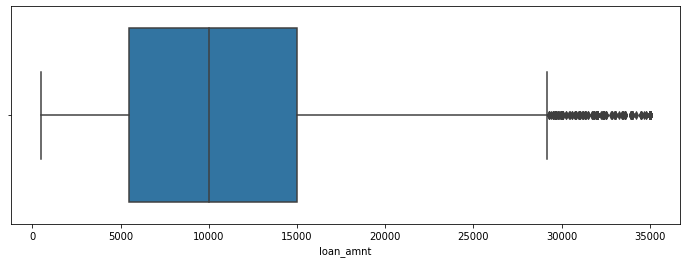

In [20]:
plt.figure(figsize=(12, 4))
sns.boxplot(loan['loan_amnt'])
plt.show()

    # Observation: Most of the loan amounts are distributed between 5000 to 15000. It is having outlier.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


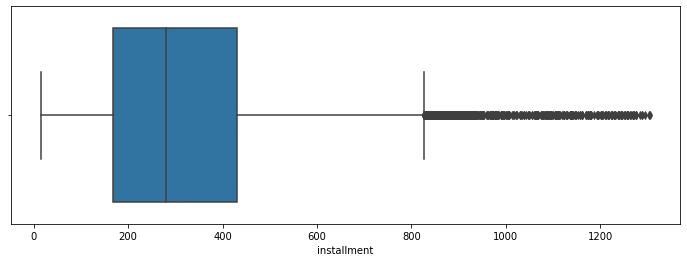

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(loan['installment'])
plt.show()

    # Observation: The instalment ranges around 200 to more than 400 

In [ ]:
# Categorical Variables

<AxesSubplot:xlabel='loan_status', ylabel='count'>

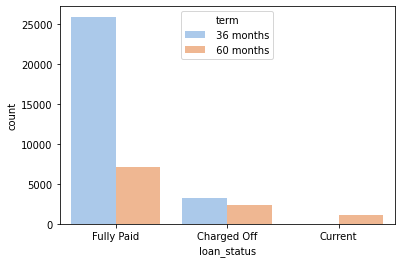

In [22]:
sns.countplot(x="loan_status", data=loan, hue='term',palette='pastel', linewidth=5)

    # Observation: 14% of loan applied are charged Off of which 73% of loan applied are having term of 36 months.

<AxesSubplot:xlabel='purpose', ylabel='count'>

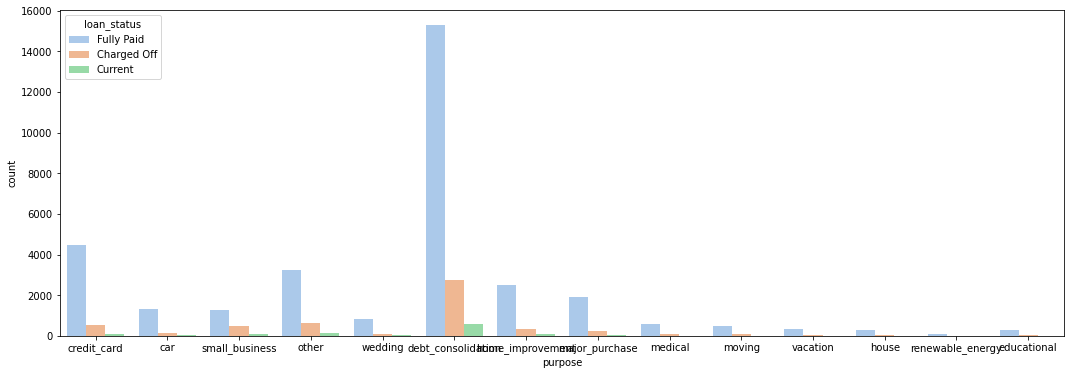

In [23]:
plt.figure(figsize=(18, 6))
sns.countplot(x="purpose", data=loan, hue='loan_status', palette='pastel', linewidth=5)

    # Observation: Approx 49% of the applicants has applied for debt consolidation. 

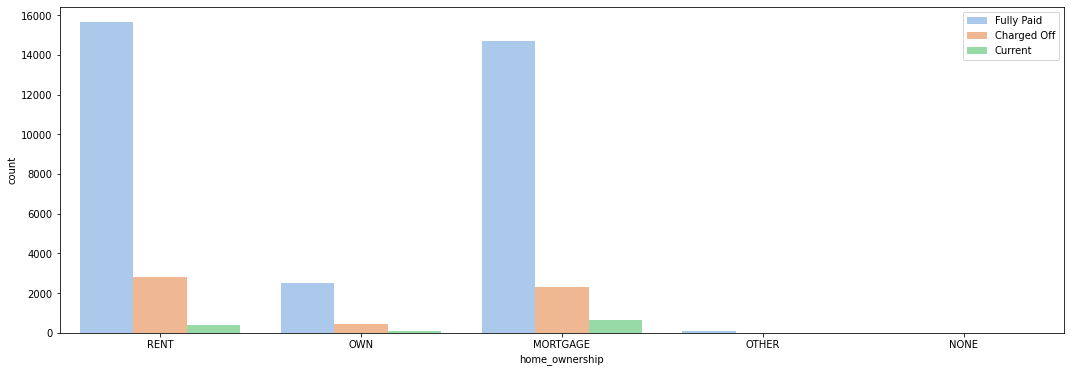

In [24]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="home_ownership", data=loan, hue='loan_status', palette='pastel', linewidth=5)
ax.legend(loc="upper right")

In [ ]:
Observation: The majority of loan applicant are having home in rent `or mortgage

# Multivariate Analysis

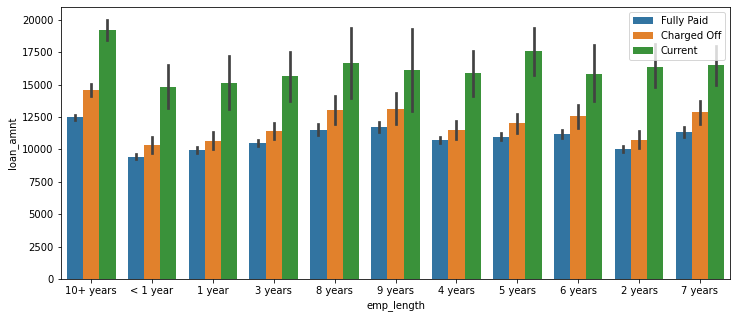

In [25]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="emp_length", y="loan_amnt",hue='loan_status',  data=loan)
ax.legend(loc="upper right")

In [98]:
    # Observation: Maximum loan with current status are under 10+ years of employment length.

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

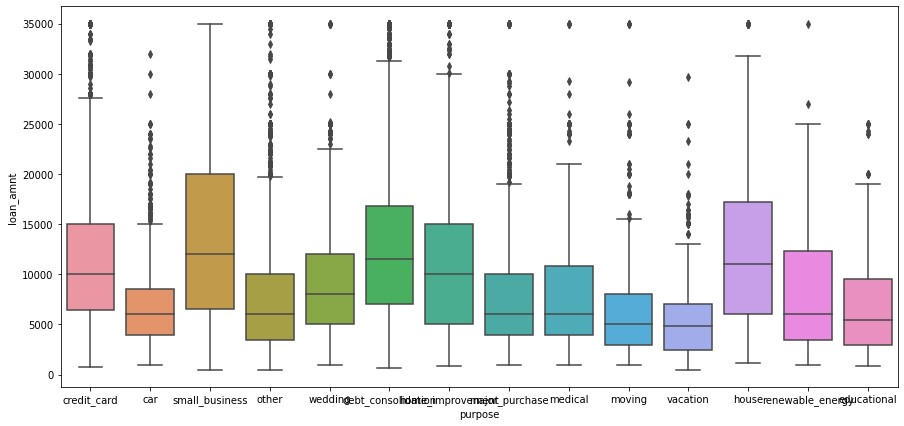

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'purpose', y = 'loan_amnt', data = loan)


    # Observation: The Small Business are taking the highest loan compared to others. 

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

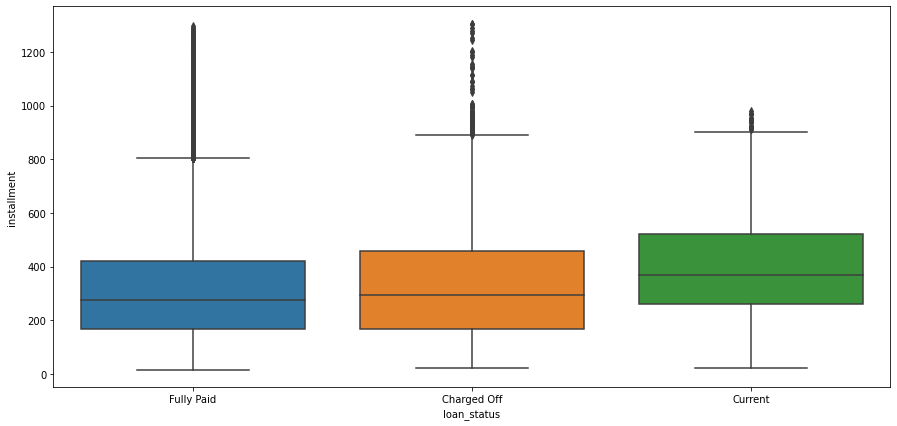

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'loan_status', y = 'installment', data = loan)


    # Observation: Loans with less instalments are having maximum charged off.

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

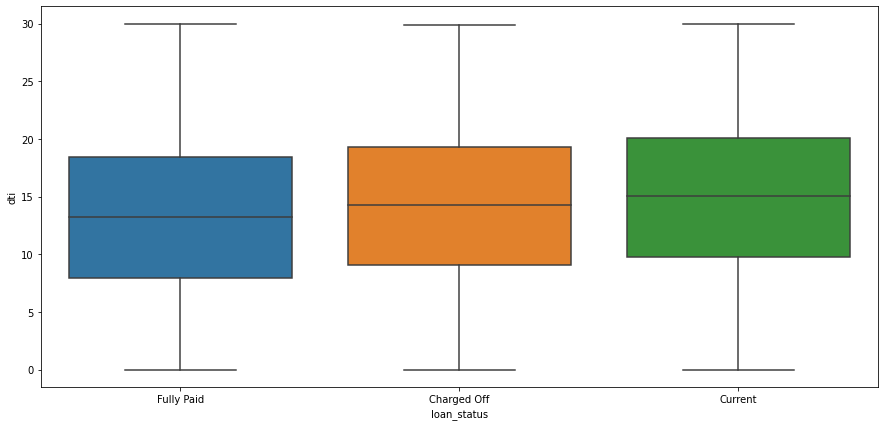

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'loan_status', y = 'dti', data = loan)


    # Observation: The loan with higher DTI are getting Charged Off more

<Figure size 1800x720 with 0 Axes>

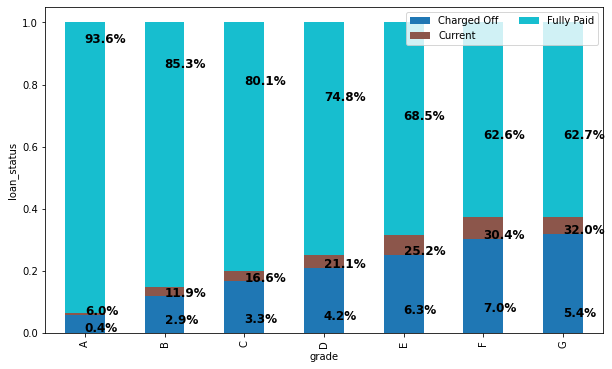

In [29]:
plt.figure(figsize=(25,10))
cross_tab_prop = pd.crosstab(index=loan['grade'],
                             columns=loan['loan_status'],normalize="index")
cross_tab_prop
cross_tab = pd.crosstab(index=loan['grade'],
                        columns=loan['loan_status'])
cross_tab
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("grade")
plt.ylabel("loan_status")


for n, x in enumerate([*cross_tab.index.values]):
    for amnt in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=amnt,
                 s=f'{np.round(amnt * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

    # Observation: The % of Charged Off are more than 16% from grad "C" to "G"

<Figure size 1800x720 with 0 Axes>

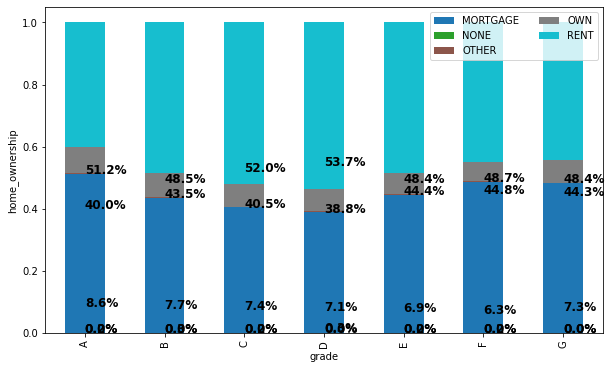

In [30]:
plt.figure(figsize=(25,10))
cross_tab_prop = pd.crosstab(index=loan['grade'],
                             columns=loan['home_ownership'],normalize="index")
cross_tab_prop
cross_tab = pd.crosstab(index=loan['grade'],
                        columns=loan['home_ownership'])
cross_tab
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("grade")
plt.ylabel("home_ownership")


for n, x in enumerate([*cross_tab.index.values]):
    for amnt in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=amnt,
                 s=f'{np.round(amnt * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
# Observation: The loan with higher interest rate starting from grad A to G 
#              and having Home ownership as Rent & Mortgage are major Charged Off.

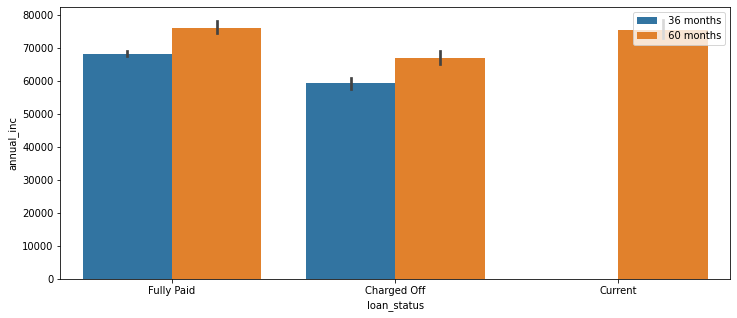

In [31]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="loan_status", y="annual_inc",hue='term',  data=loan)
ax.legend(loc="upper right")

In [42]:
# Observation: The "fully paid" is increasing with increasing in annual income.

# Correlation Matrix : All Continuos(Numeric) Variables

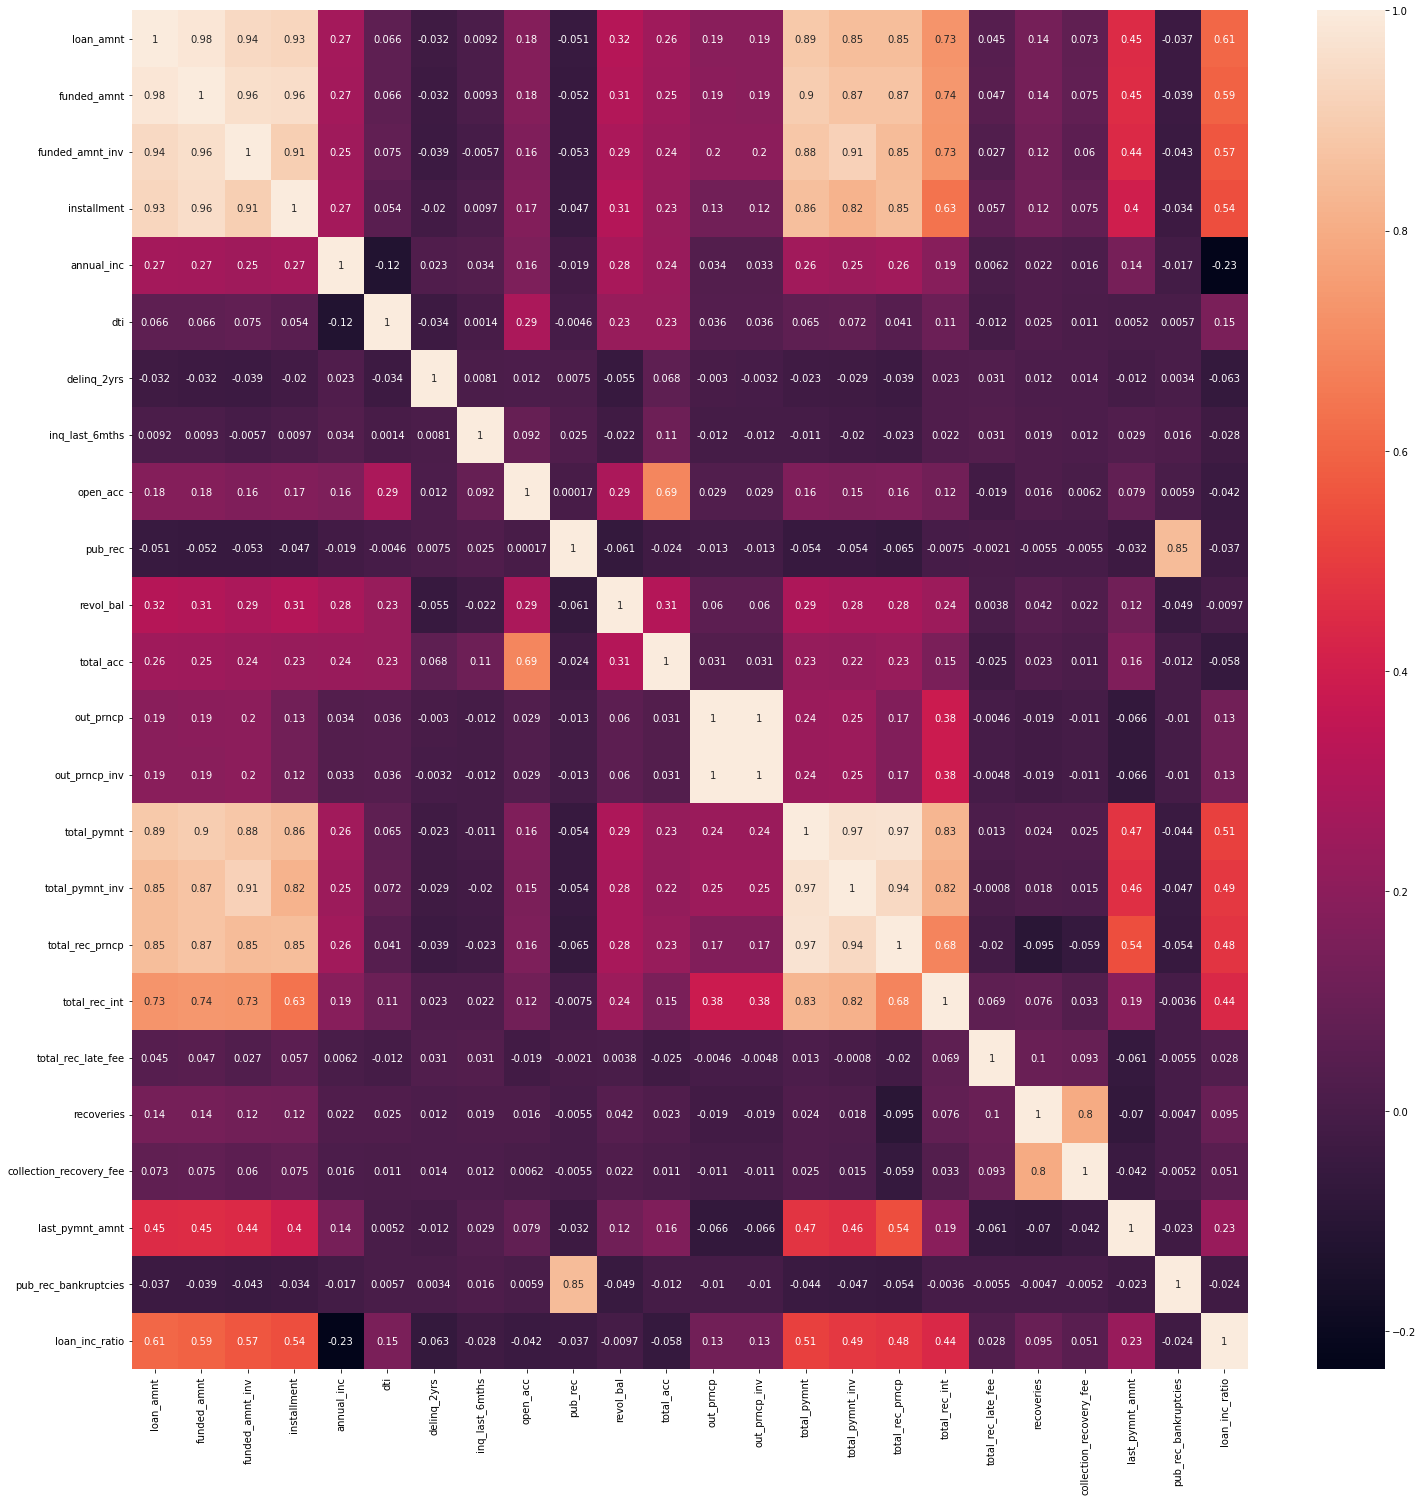

In [32]:
plt.figure(figsize=(25,25))
df = pd.DataFrame(loan)

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# 0bservations: From the Heatmap, the 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are  closely interrelated. 
#               So we can take any one column out of them for our analysis.

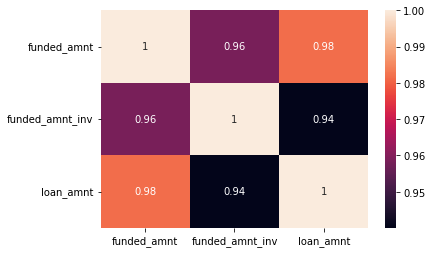

In [34]:
df = pd.DataFrame(loan,columns=['funded_amnt','funded_amnt_inv','loan_amnt'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Observations: From the Heatmap, the 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are  closely interrelated. 

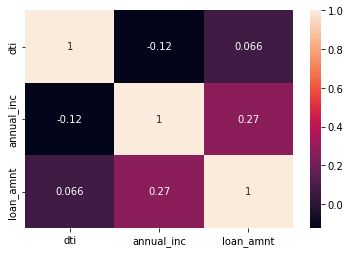

In [41]:
df = pd.DataFrame(loan,columns=['dti','annual_inc','loan_amnt'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Observation: With increase in income 'dti' is decreasing. Thus  higher loan amount can be sanctioned.